In [1]:
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from konlpy.tag import Mecab
import random
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:

# matplotlib 그래프를 위한 설정
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


In [3]:

# Load the data
file_path = 'youtube_channel_comments_data_20240606_104600.csv'
data = pd.read_csv(file_path)


In [4]:

# Convert videoPublishedAt to datetime
data['videoPublishedAt'] = pd.to_datetime(data['videoPublishedAt'])

# Calculate the view counts for each video
video_view_counts = data.groupby(['channelId', 'videoId', 'videoTitle']).agg(
    viewCount=('viewCount', 'first')
).reset_index()



In [5]:
# Get top 5 most viewed videos for each channel
top_videos = video_view_counts.sort_values(by='viewCount', ascending=False).groupby('channelId').head(5)

# Filter the original data to include only comments from the top videos
top_video_comments = data[data['videoId'].isin(top_videos['videoId'])]

# Display the statistics in a table format
# from IPython.display import display
# display(top_video_comments)

top_video_comments.head()

,channelId,channelTitle,channelPublishedAt,subscriberCount,videoId,videoTitle,videoAuthorId,videoPublishedAt,duration,viewCount,likeCount,dislikeCount,commentId,commentAuthor,authorId,commentText,commentLikeCount,commentPublishedAt,parentCommentId
2477,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,38wwiACyti0,암세포가 증식할때 우리 몸이 보내는 위험신호#암증상#암위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-05-05 08:43:02+00:00,PT59S,1526564,29972,0,UgxOahM4wWGdz_EdYLF4AaABAg,@user-px3mg1eq3j,UCKcTcvt2x0Lm_fvTGNvXrHQ,김선태 주무관님 드디어 의사면허를 따셨군요,0,2024-06-05T23:16:53Z,NaN
2478,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,38wwiACyti0,암세포가 증식할때 우리 몸이 보내는 위험신호#암증상#암위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-05-05 08:43:02+00:00,PT59S,1526564,29972,0,UgylNZcRm6JaoGXME8t4AaABAg,@user-ek9wu9el7n,UCrHfjMrL1ThrqTLC6UOH1jw,약사주제에 어딜? 니멋대로 판단해,0,2024-06-05T20:27:05Z,NaN
2479,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,38wwiACyti0,암세포가 증식할때 우리 몸이 보내는 위험신호#암증상#암위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-05-05 08:43:02+00:00,PT59S,1526564,29972,0,Ugy2REcqzSpBdxCEsut4AaABAg,@rozepopq,UCtFMUDNNzncrkFAff-vPmkA,대장내시경은 죽어도 싫은데 어느병원 무슨검사를 받으면 될지 알려주시겠어요😢(병원무서...,0,2024-06-05T16:06:20Z,NaN
2480,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,38wwiACyti0,암세포가 증식할때 우리 몸이 보내는 위험신호#암증상#암위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-05-05 08:43:02+00:00,PT59S,1526564,29972,0,Ugy2REcqzSpBdxCEsut4AaABAg.A4JGwvM75DSA4JLHmLEIY1,@flower0k46,UCFBMr4M2A8ujp1C9kL4x9og,소화기 내과가 있는 병원 가시면 되는데 너무 작은 개인병원 보다는 규모가 있는 병원...,0,2024-06-05T16:44:16Z,Ugy2REcqzSpBdxCEsut4AaABAg
2481,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,38wwiACyti0,암세포가 증식할때 우리 몸이 보내는 위험신호#암증상#암위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-05-05 08:43:02+00:00,PT59S,1526564,29972,0,UgxM_5GAdMNS44TQRI54AaABAg,@sumi2629,UC_R8s1cPuKUWfJvbhITOCpw,"저 유방암인데 2,4,5번을 느꼈어요\n평소낮잠을 10분이라도 꼭잤어야할정도로 피로...",0,2024-06-05T13:18:25Z,NaN


In [6]:
# 한국어 불용어 리스트
stop_words  = set([
    '이', '그', '저', '것', '수', '것을', '그리고', '더', '더욱', '너무', '정말', '진짜', '이제', '다시', '이런', '저런', '그런', '또', '또는',
    '하지만', '그러나', '그래도', '반면에', '이외에', '이렇게', '저렇게', '여기', '저기', '이것', '저것', '여러', '여러분', '너', '나', '우리',
    '당신', '어떤', '어느', '무엇', '누구', '모두', '많은', '좋은', '아주', '매우', '너무', '정말', '진짜', '자주', '항상', '가장', '크게', '작게',
    '게', '거'
])

In [7]:
# 추가 불용어 정의
custom_stop_words = set([
    '안녕하세요', '감사합니다', '잘', '다시', '정말', '이것', '그것', '그리고', '그러나', '하지만', 
    '해서', '하는', '같은', '이런', '저런', '그런', '할', '있는', '없는', '있는지', '없는지', '시청', '감사', '생각',
    '양과자', '선생'
])

In [8]:
# 확장된 영양제 및 관련 키워드 목록 정의
nutrient_keywords = set([
    # 영양제 및 건강보조식품
    '비타민', '칼슘', '오메가3', '프로바이오틱스', '철분', '마그네슘', '아연', '비타민A', '비타민B', '비타민C', '비타민D', '비타민E', '엽산',
    '멜라토닌', '베르베린', '유산균', '단백질', '아미노산', '콜라겐', '코엔자임Q10', '글루타민', '알로에',
    '홍삼', '녹용', '스피루리나', '클로렐라', '히알루론산', '글루코사민', '로얄젤리', '프로폴리스',
    
    # 질병
    '면역', '피로', '피곤', '수면', '스트레스', '소화', '혈압', '당뇨', '콜레스테롤', '간', '간건강', '심장',
    '장', '장건강', '알레르기', '감기', '독감', '빈혈', '치매', '우울증', '불안증', '폐렴', '천식',
    
    # 신체 부위
    '관절', '뼈', '눈', '피부', '탈모', '간', '심장', '장', '위', '신장', '간', '폐', '두뇌', '척추', '근육',
    
    # 증상
    '소화불량', '변비', '설사', '복통', '두통', '어지럼증', '피부건조', '여드름', '탈모', '부종', '수족냉증',
    '불면증', '과민성대장증후군', '속쓰림', '메스꺼움', '구토', '기침', '가래', '가슴답답함', '숨가쁨',
    
    # 추가 키워드
    '항산화', '항염', '항바이러스', '항균', '항진균', '디톡스', '해독', '활력', '에너지', '체력증강', '근력증가'
])

In [9]:
# 텍스트 전처리 함수
def preprocess_text(text):
    mecab = Mecab()
    tokens = mecab.morphs(text)
    tokens = [word for word in tokens if word not in stop_words and word not in custom_stop_words]
    return tokens

In [10]:
# 워드 클라우드 생성 및 시각화 함수
def generate_word_cloud(text, title):
       
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
        colormap='viridis'
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


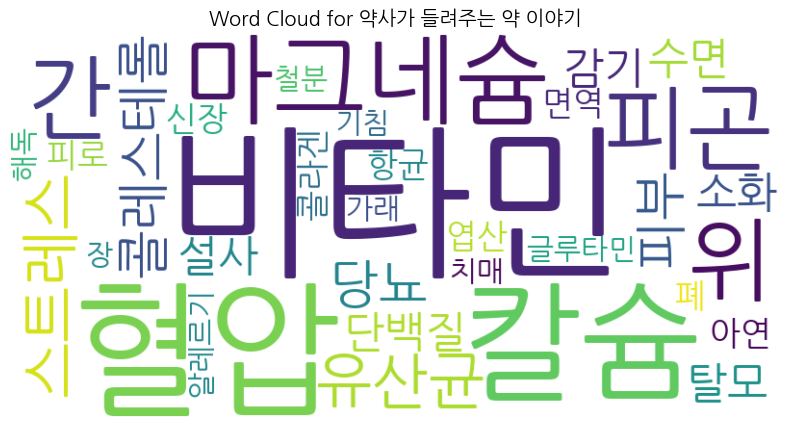

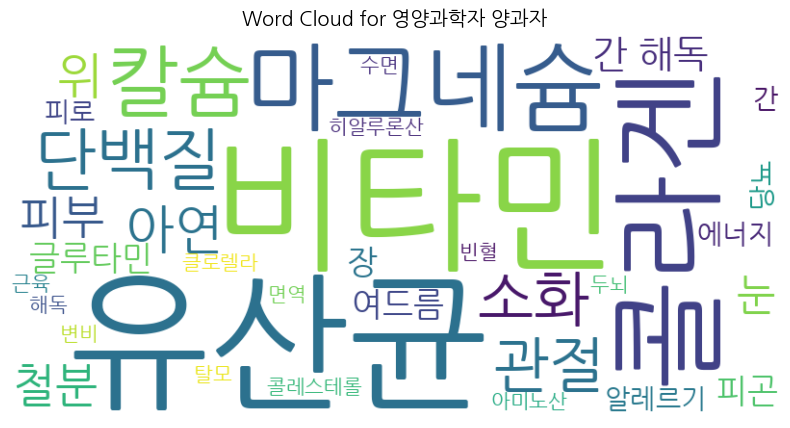

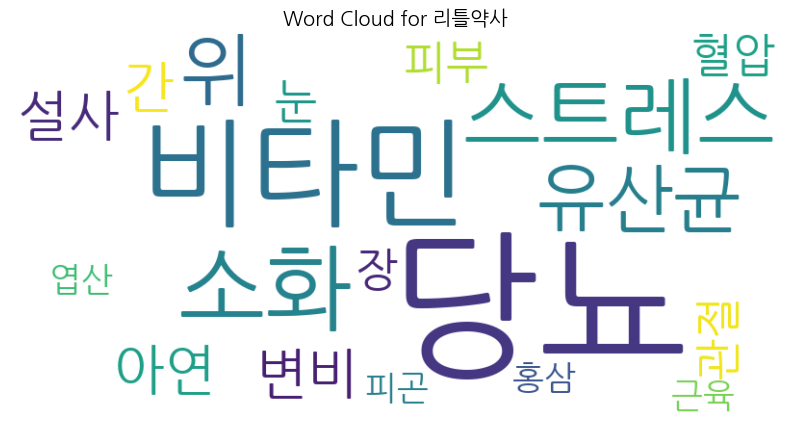

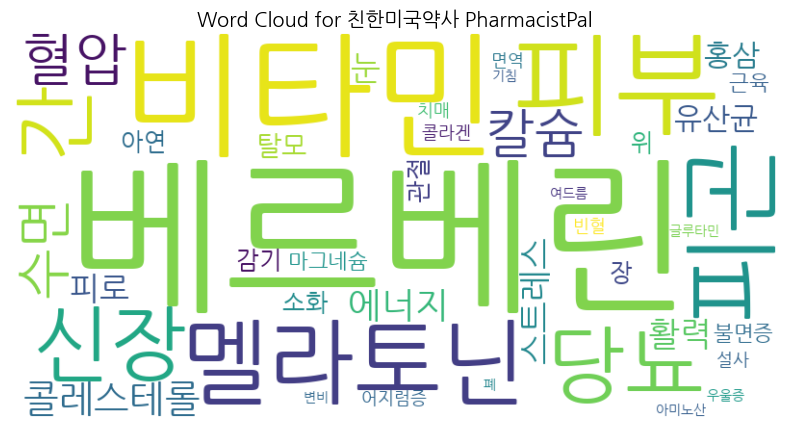

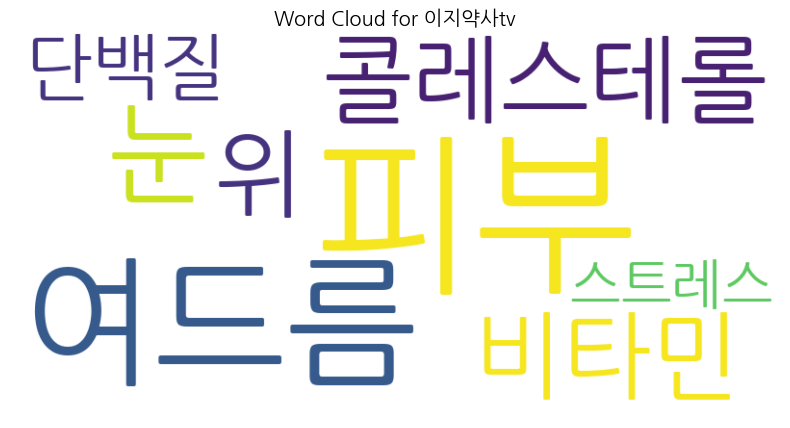

In [11]:
# 샘플링할 댓글 수 설정 (예: 500개)
sample_size = 500

# 각 채널별로 댓글을 전처리하고 워드 클라우드를 생성
channels = top_video_comments['channelId'].unique()
channel_titles = top_video_comments.groupby('channelId')['channelTitle'].first()

# for channel_id in channels:
#     channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
#     all_comments = ' '.join(channel_comments['commentText'].dropna())
#     tokens = preprocess_text(all_comments)
#     filtered_tokens = [word for word in tokens if word in nutrient_keywords]
#     text = ' '.join(filtered_tokens)
#     generate_word_cloud(text, f"Word Cloud for {channel_titles[channel_id]}")

for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    text = ' '.join(filtered_tokens)
    generate_word_cloud(text, f"Word Cloud for {channel_titles[channel_id]}")

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc

# 한글 폰트 설정 (예: NanumGothic, AppleGothic, Malgun Gothic 등)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def create_keyword_network(tokens):
    G = nx.Graph()
    # 토큰 리스트에서 연속된 키워드 쌍을 노드로 추가
    for i in range(len(tokens) - 1):
        if tokens[i] in nutrient_keywords and tokens[i+1] in nutrient_keywords:
            if G.has_edge(tokens[i], tokens[i+1]):
                G[tokens[i]][tokens[i+1]]['weight'] += 1
            else:
                G.add_edge(tokens[i], tokens[i+1], weight=1)
    return G



def draw_network(G, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=3000, edge_color='gray', font_size=15, font_family=font_name)  # 폰트 크기를 15로 설정
    plt.title(title, fontsize=20)
    plt.show()

def calculate_centrality(G):
    centrality = nx.degree_centrality(G)
    # 중심성이 높은 상위 5개 노드 출력
    top_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 nodes by centrality:", top_centrality)


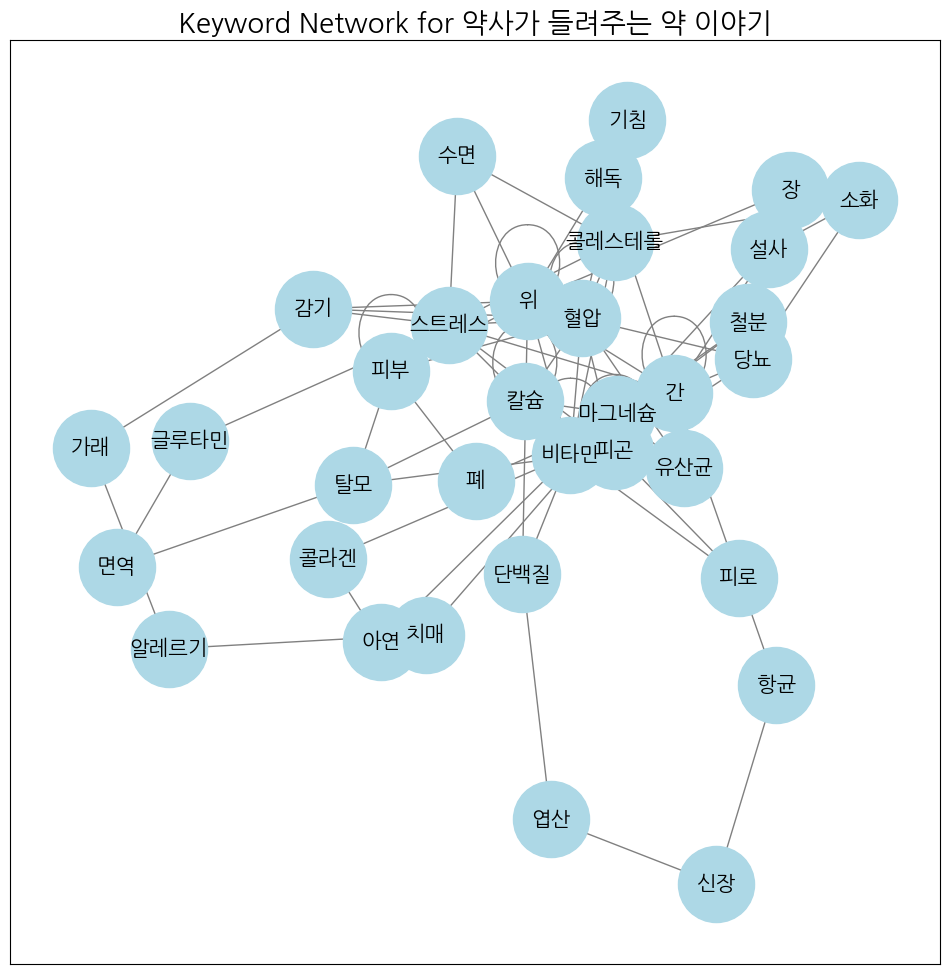

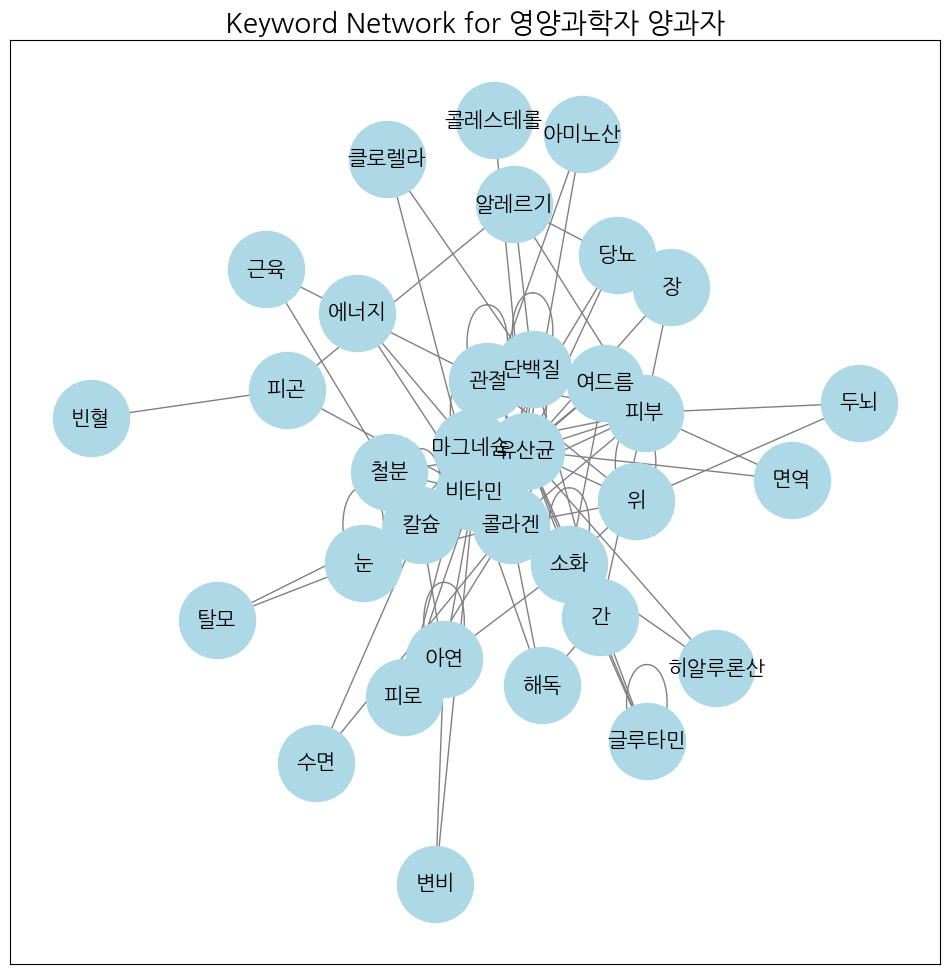

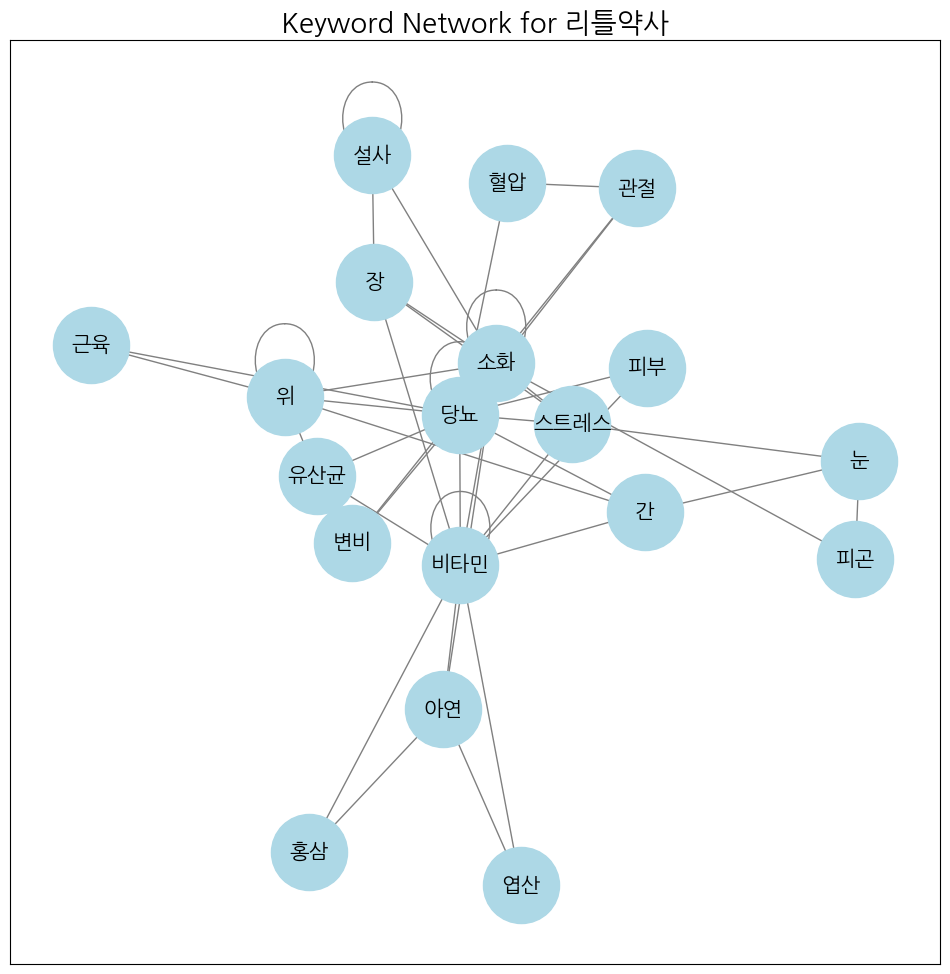

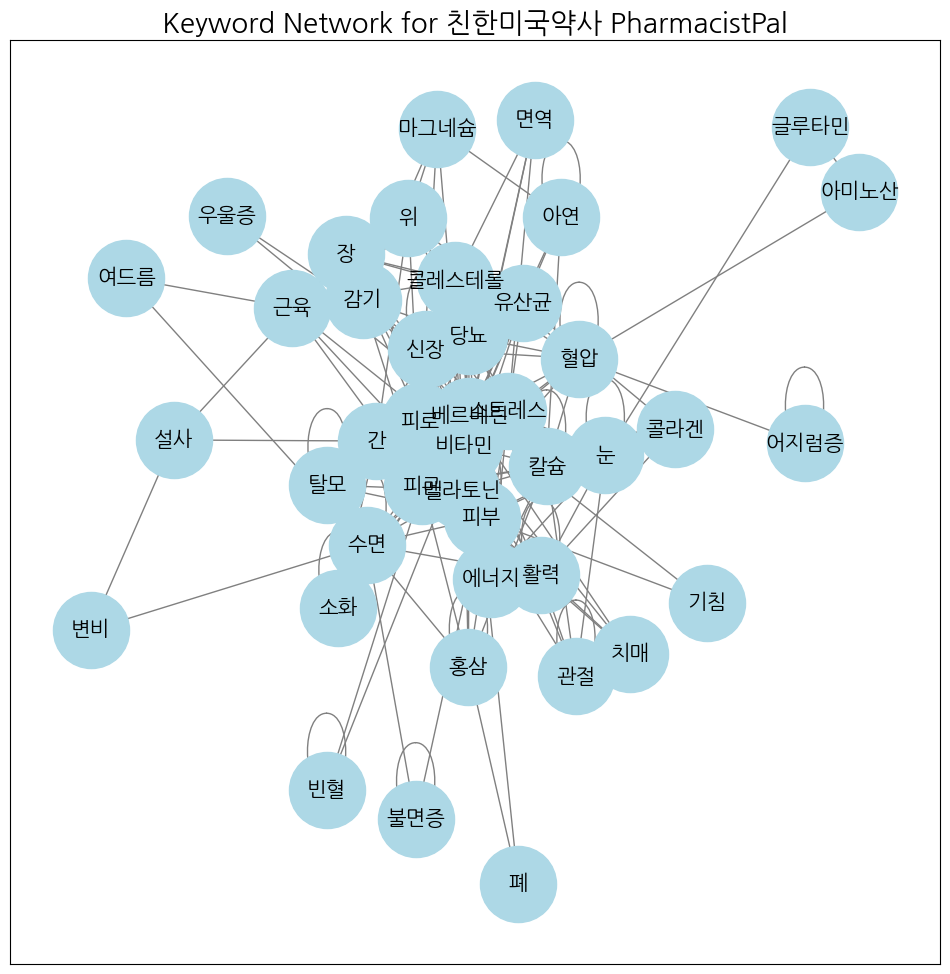

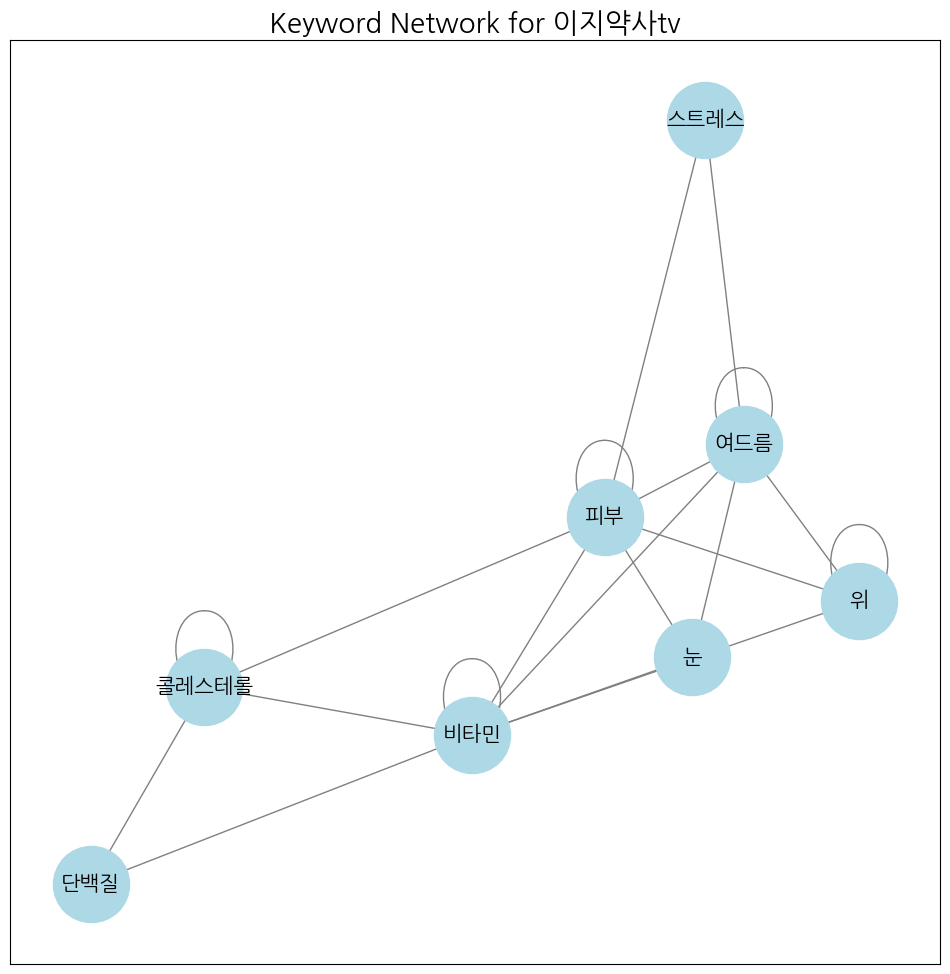

In [13]:
# 각 채널별로 네트워크 분석 수행
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    G = create_keyword_network(filtered_tokens)
    draw_network(G, f"Keyword Network for {channel_titles[channel_id]}")

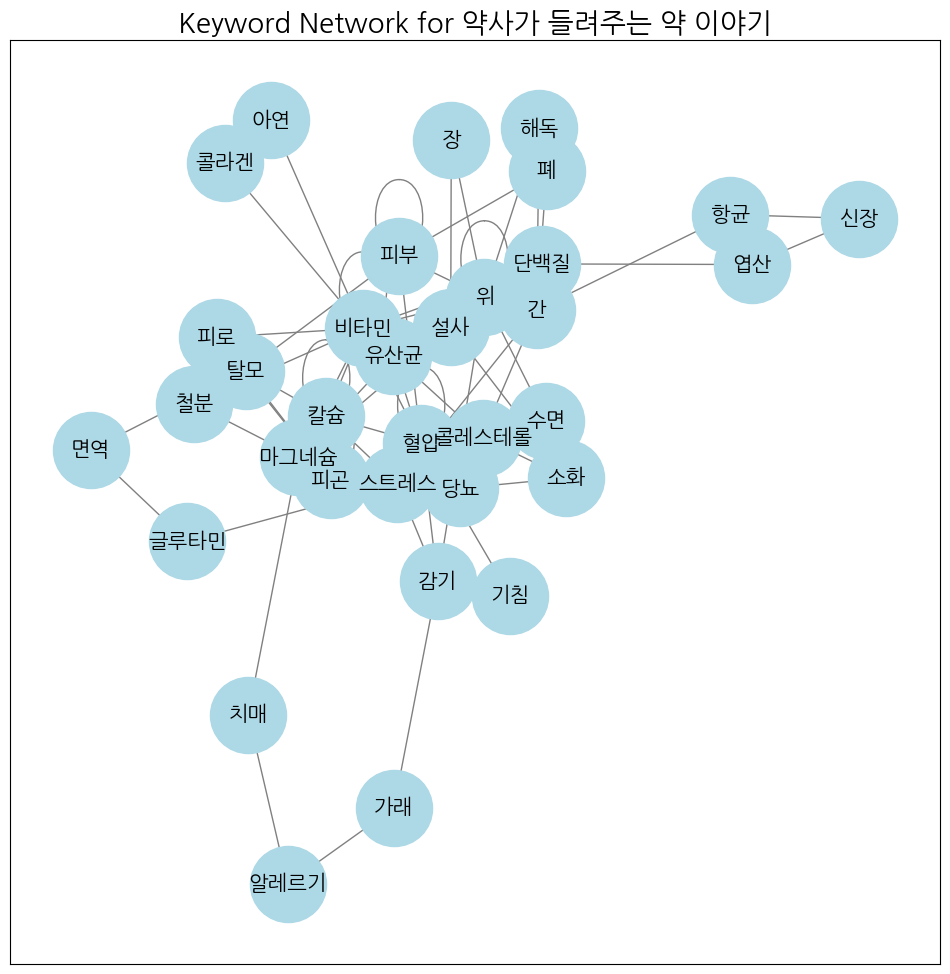

Top 5 nodes by centrality: [('비타민', 0.3939393939393939), ('혈압', 0.36363636363636365), ('간', 0.30303030303030304), ('위', 0.30303030303030304), ('피곤', 0.2727272727272727)]


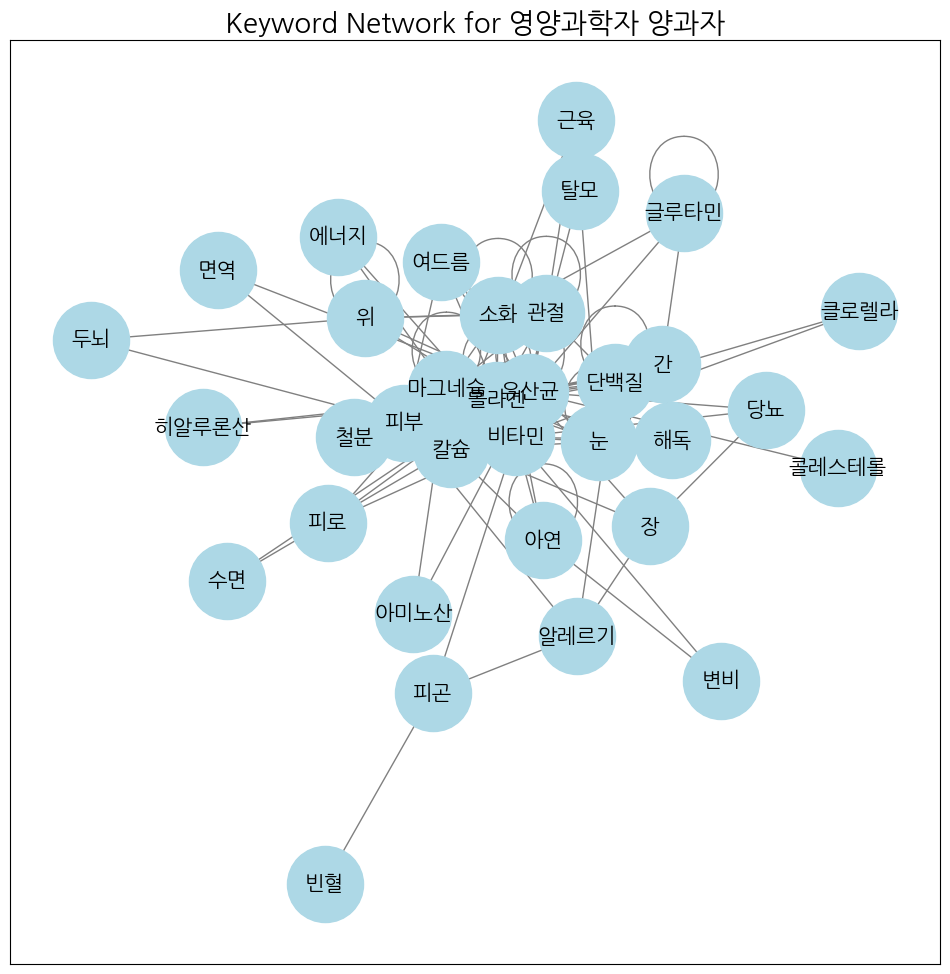

Top 5 nodes by centrality: [('유산균', 0.6666666666666667), ('비타민', 0.6363636363636364), ('콜라겐', 0.5454545454545454), ('마그네슘', 0.3939393939393939), ('피부', 0.36363636363636365)]


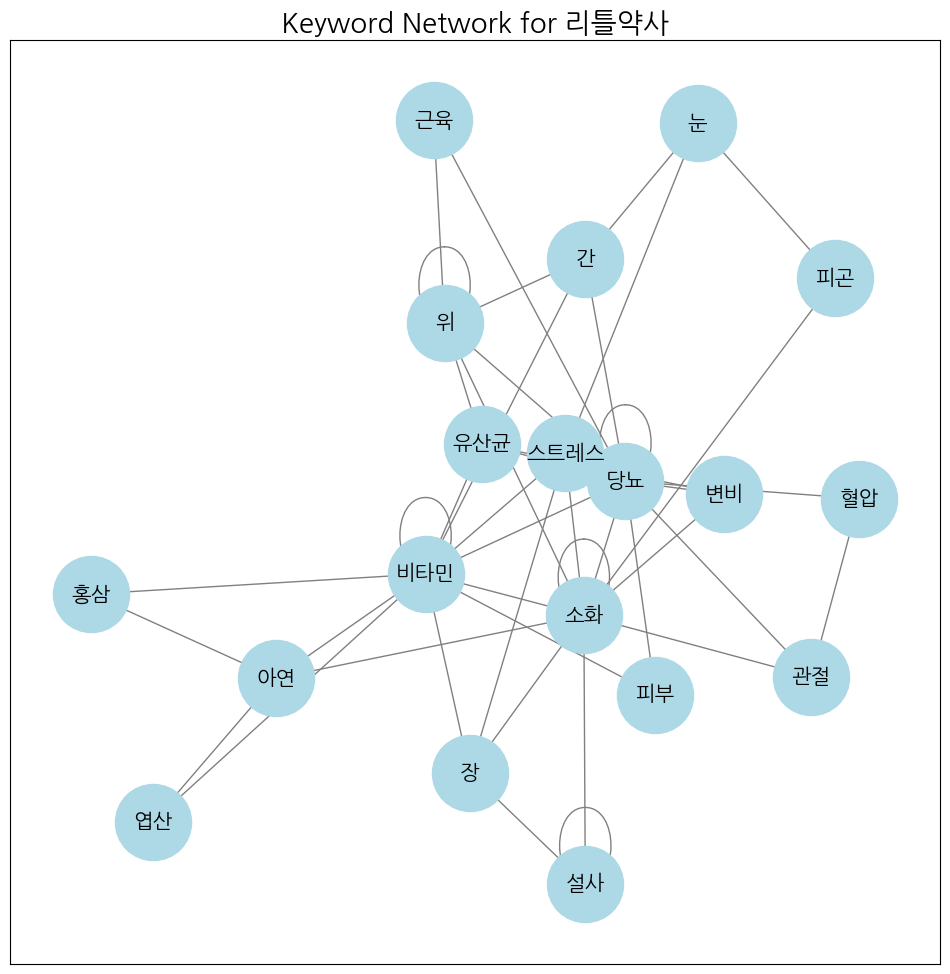

Top 5 nodes by centrality: [('당뇨', 0.7222222222222222), ('소화', 0.6666666666666666), ('비타민', 0.6666666666666666), ('위', 0.38888888888888884), ('스트레스', 0.2777777777777778)]


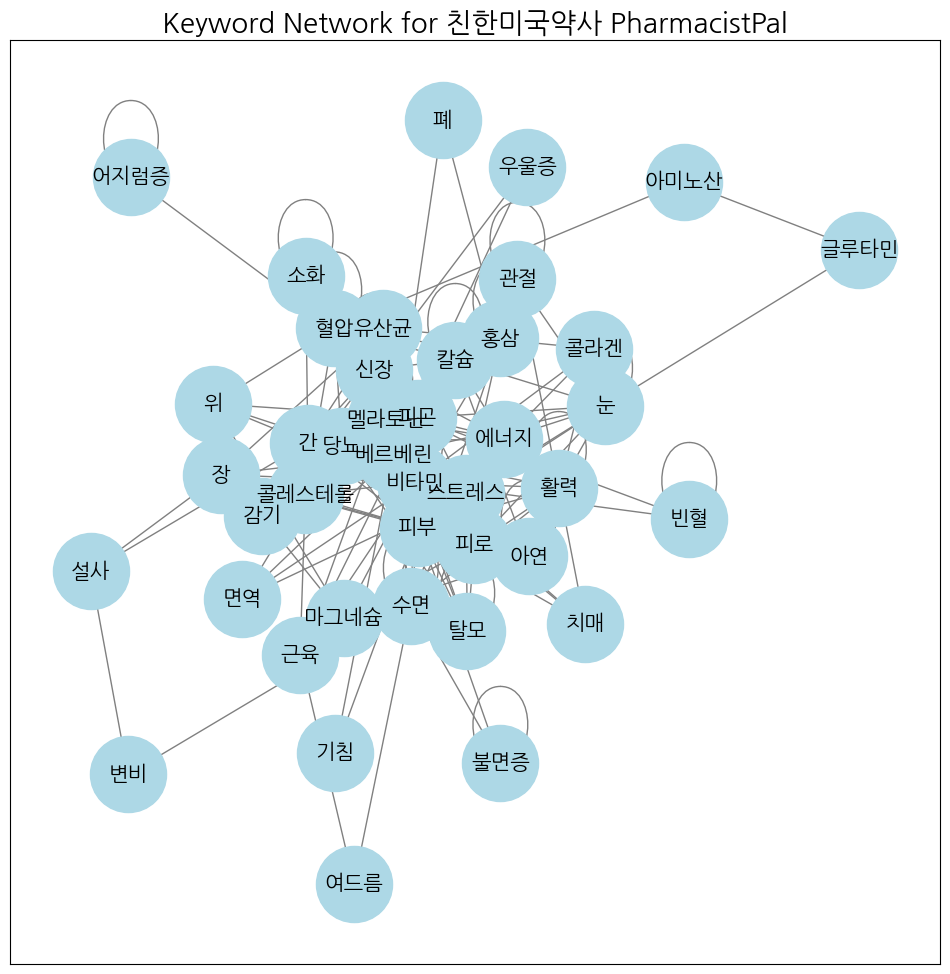

Top 5 nodes by centrality: [('비타민', 0.6829268292682927), ('베르베린', 0.6585365853658537), ('피부', 0.5121951219512195), ('피곤', 0.4878048780487805), ('멜라토닌', 0.43902439024390244)]


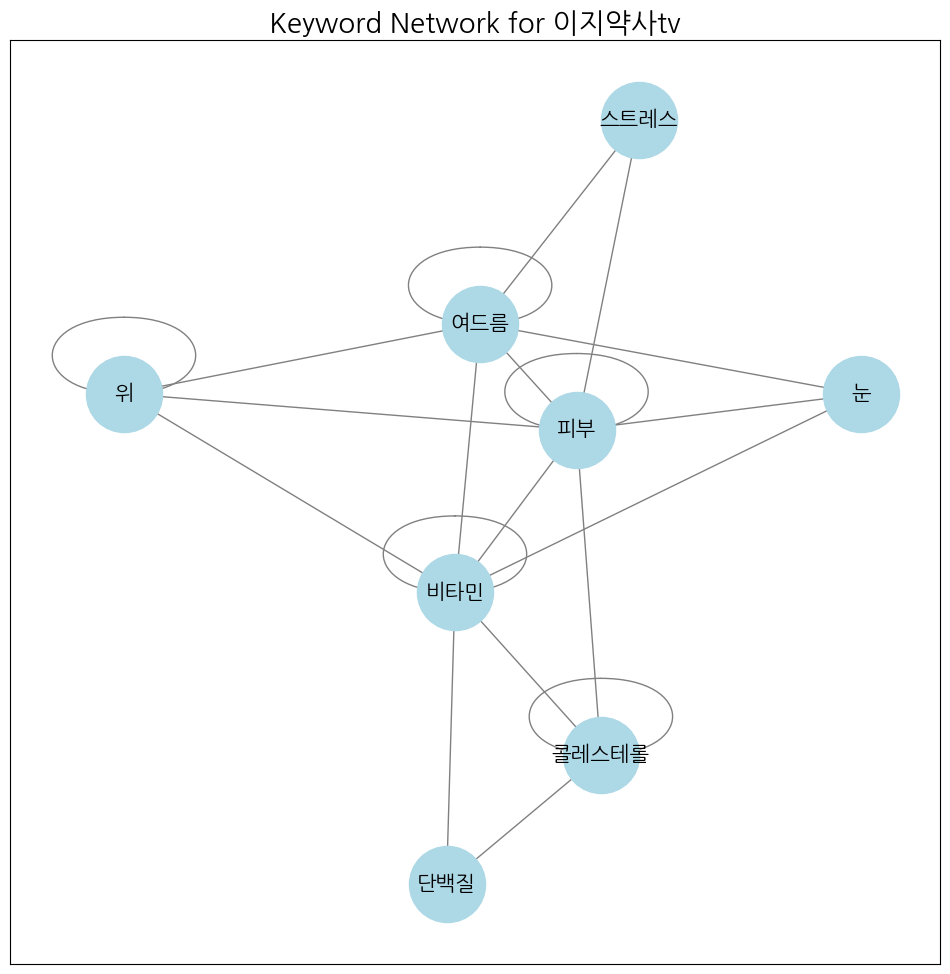

Top 5 nodes by centrality: [('피부', 1.1428571428571428), ('비타민', 1.1428571428571428), ('여드름', 1.0), ('위', 0.7142857142857142), ('콜레스테롤', 0.7142857142857142)]


In [15]:
# 각 채널별로 네트워크 분석 및 중심성 계산 수행
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    G = create_keyword_network(filtered_tokens)
    draw_network(G, f"Keyword Network for {channel_titles[channel_id]}")
    calculate_centrality(G)

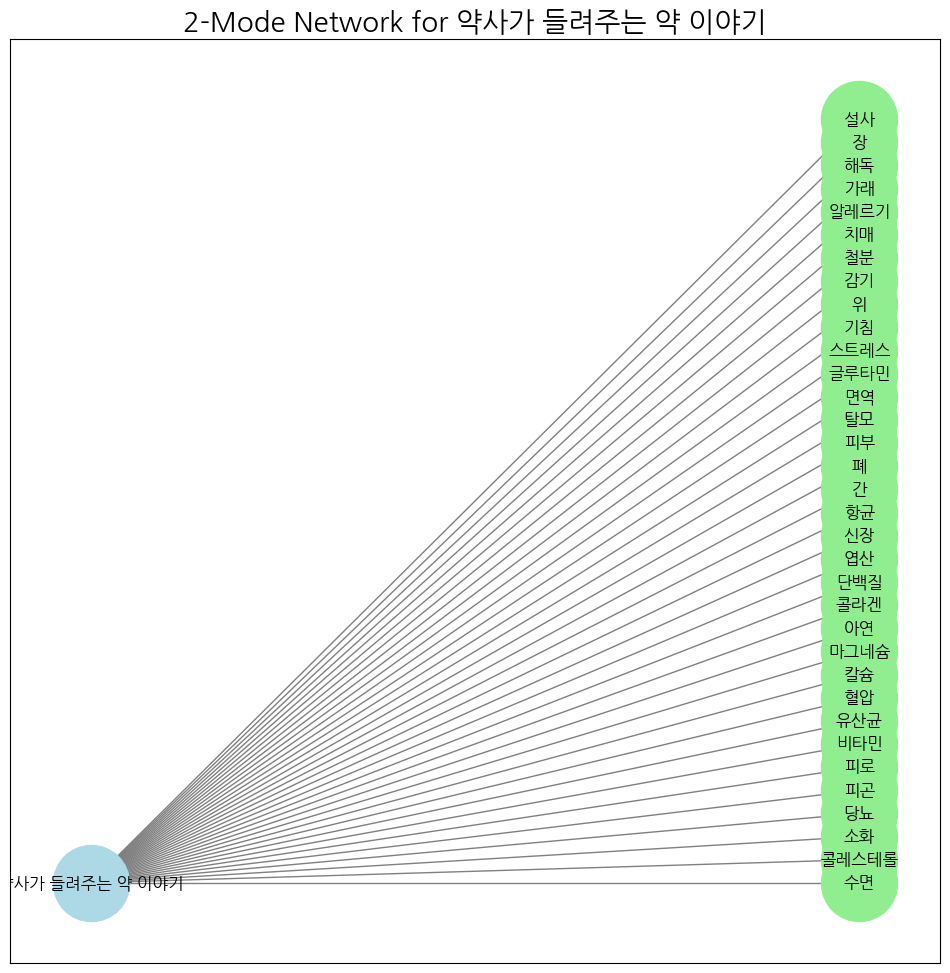

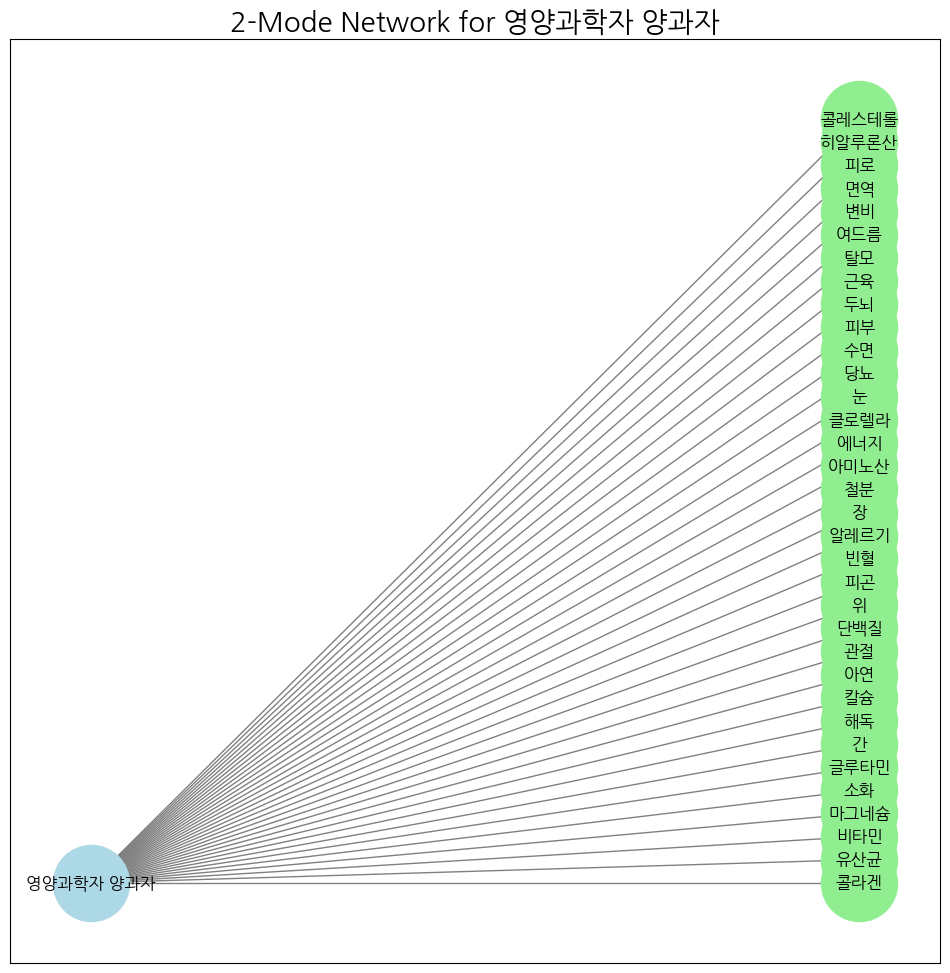

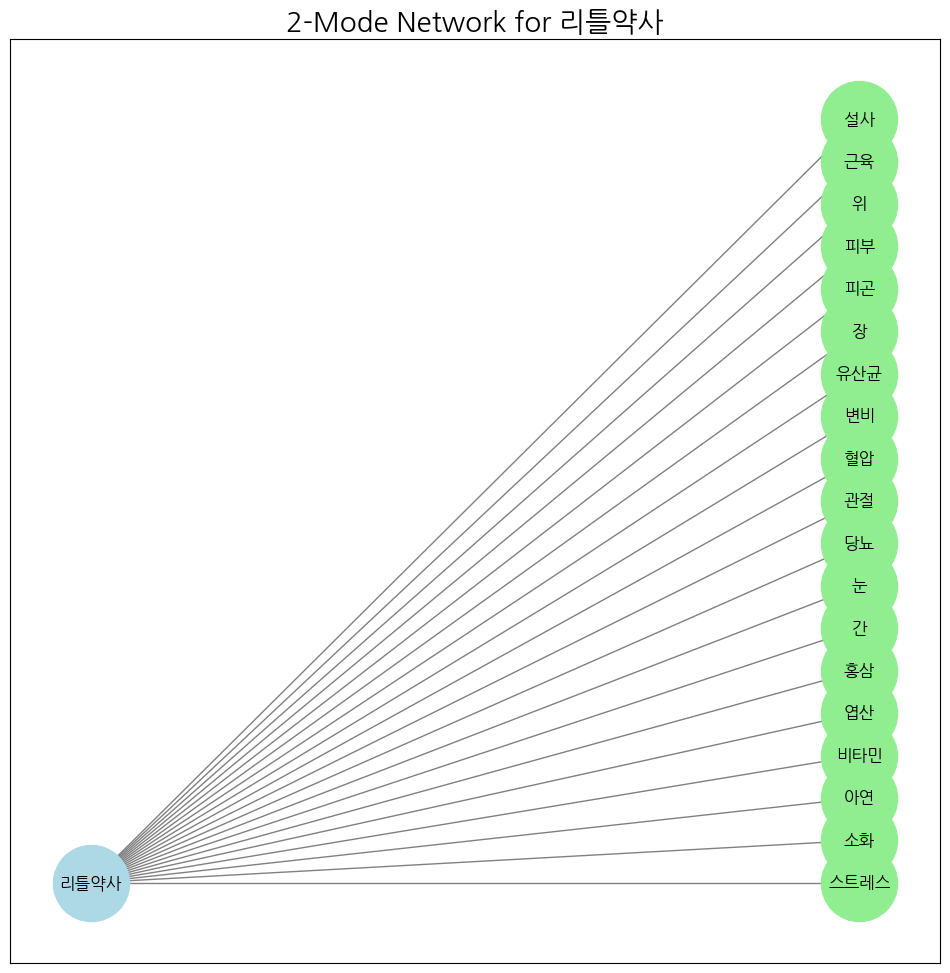

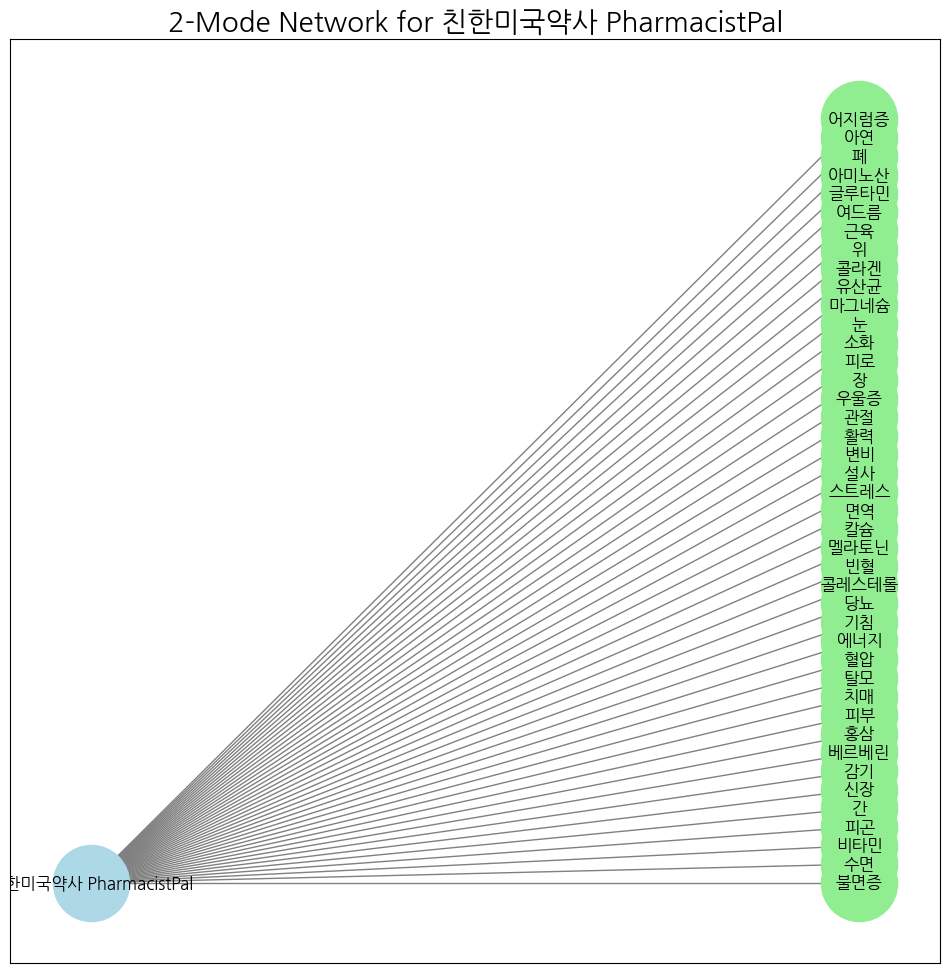

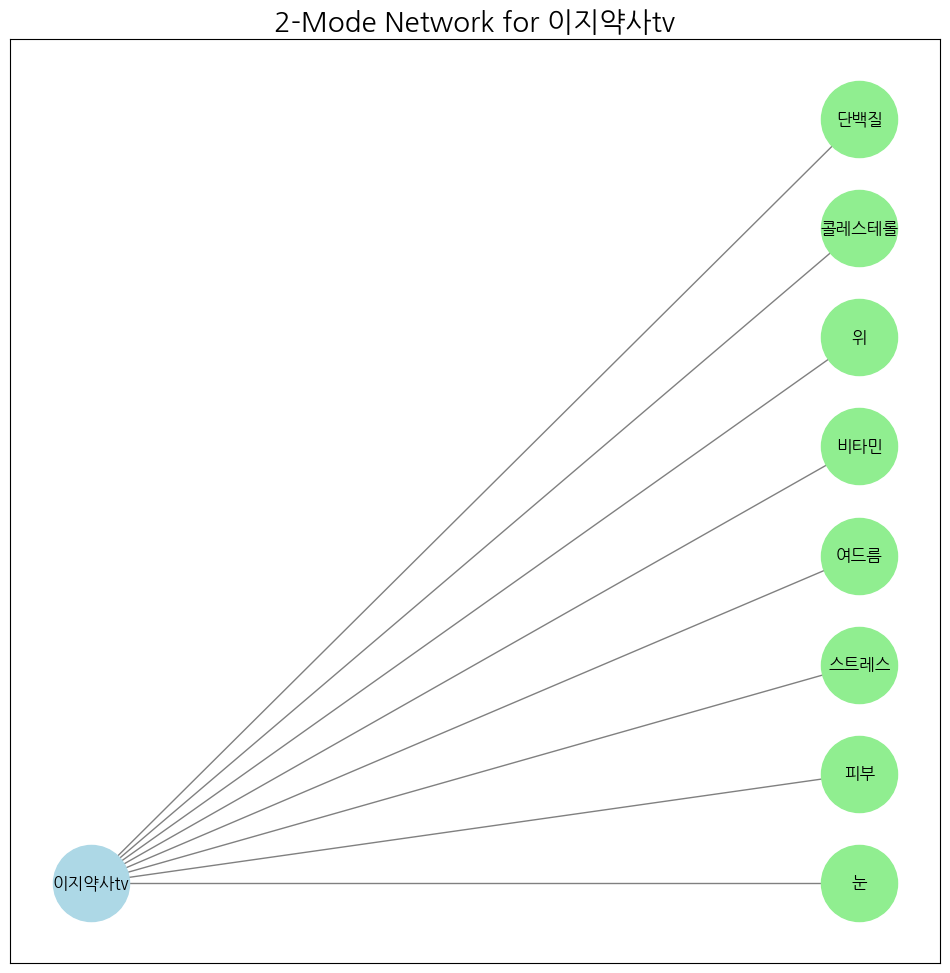

In [16]:
def create_2mode_network(channel, tokens):
    G = nx.Graph()
    # 채널 노드 추가
    G.add_node(channel, bipartite=0)
    # 키워드 노드 추가 및 채널과 연결
    for token in tokens:
        if token in nutrient_keywords:
            G.add_node(token, bipartite=1)
            G.add_edge(channel, token)
    return G

def draw_network(G, title):
    plt.figure(figsize=(12, 12))
    # 2-mode 네트워크 레이아웃 분리
    top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
    bottom_nodes = set(G) - top_nodes
    pos = nx.bipartite_layout(G, top_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='lightblue', node_size=3000)
    nx.draw_networkx_nodes(G, pos, nodelist=bottom_nodes, node_color='lightgreen', node_size=3000)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_name)
    plt.title(title, fontsize=20)
    plt.show()

# 각 채널별로 2-mode 네트워크 분석 수행
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    G = create_2mode_network(channel_titles[channel_id], tokens)
    draw_network(G, f"2-Mode Network for {channel_titles[channel_id]}")